In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [5]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 83 to 8
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 6.2 KB


In [17]:
data.shape

(200, 3)

In [18]:
data.describe()

,CustomerID,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000
std,57.879185,26.264721,25.823522
min,1.000000,15.000000,1.000000
25%,50.750000,41.500000,34.750000
50%,100.500000,61.500000,50.000000
75%,150.250000,78.000000,73.000000
max,200.000000,137.000000,99.000000


In [19]:
data.isnull().sum()

CustomerID                0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.drop(['Gender'], axis=1, inplace=True)


<AxesSubplot:>

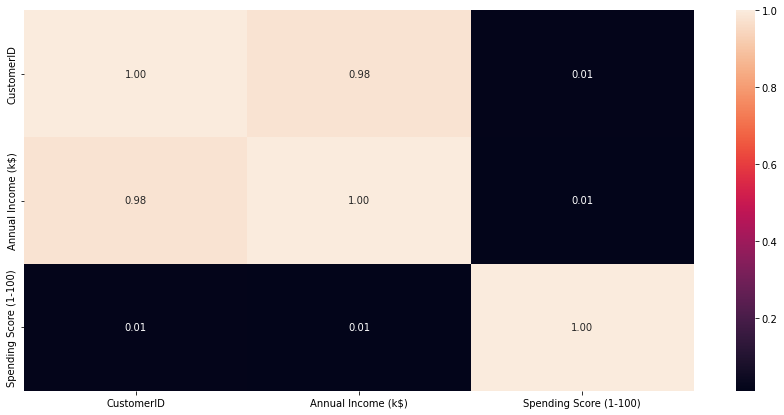

In [21]:
import seaborn as sns
f,ax = plt.subplots(figsize=(15, 7))
sns.heatmap(data.corr(), annot = True, fmt= '.2f')

In [31]:
data = data.sample(frac=1)
data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
17,18,21,66
107,108,63,46
86,87,57,58
171,172,87,75
130,131,71,9


In [32]:
from numpy import unique
from numpy import where

In [33]:
data_x = data.iloc[:,[0,1]].values

In [34]:
model = DBSCAN(eps=0.9, min_samples=100)
yhat = model.fit_predict(data_x)
clusters = unique(yhat)

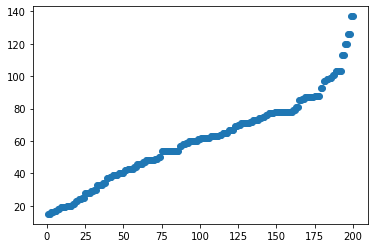

In [35]:
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(data_x[row_ix, 0], data_x[row_ix, 1])

plt.show()